In [52]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data = "Desktop/city_data.csv"
ride_data = "Desktop/ride_data.csv"

city_display = pd.read_csv(city_data)
ride_display = pd.read_csv(ride_data)

combined_display = pd.merge(city_display, ride_display)
combined_display.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [29]:
type_average = combined_display.groupby(['city']).mean()
type_average_fare_city = list(type_average['fare'])
type_average_fare_city

total_rides = combined_display.groupby(['city'])
total_rides_per_city = total_rides['city'].value_counts()

driver_count_by_city = combined_display.groupby('city').count()['driver_count']
driver_count_by_city
driver_count_by_city_list = list(driver_count_by_city)

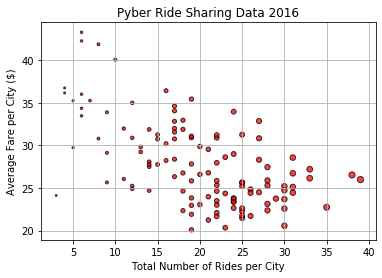

In [30]:
plt.scatter(total_rides_per_city, type_average_fare_city, marker="o", c="red", edgecolors="black",
            s=driver_count_by_city_list, alpha=0.75)
plt.title('Pyber Ride Sharing Data 2016')
plt.xlabel('Total Number of Rides per City')
plt.ylabel('Average Fare per City ($)')
plt.grid()


([<matplotlib.patches.Wedge at 0x1179c5588>,
 [Text(-0.9735819188531014, 0.5119943820808126, 'Rural'),
  Text(-0.8505386879122898, -0.6975556897943279, 'Suburban'),
  Text(0.9792721358604437, 0.5010250332341937, 'Urban')],
 [Text(-0.5310446830107826, 0.2792696629531705, '6.8%'),
  Text(-0.4639301934067035, -0.380484921705997, '30.5%'),
  Text(0.5341484377420601, 0.27328638176410563, '62.7%')])

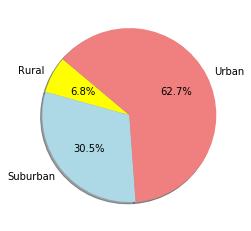

In [31]:
fares_by_city = combined_display.groupby('type').sum()
fares_by_city

total_fares = fares_by_city['fare'].sum()
total_fares

average_fares_by_city = fares_by_city/total_fares
average_fares_by_city_list = list(average_fares_by_city['fare'])
average_fares_by_city_list

fares_column = fares_by_city['fare']
percentages = fares_column

labels = ["Rural", "Suburban", "Urban"]
sizes = average_fares_by_city_list
colors = ["yellow", "lightblue", "lightcoral"]
explode = [0, 0, 0]

plt.pie(sizes, explode = explode,autopct='%1.1f%%', labels = labels, colors = colors, shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x117a7a358>,
 [Text(-0.9475355551847633, 0.5587274574071894, 'Rural'),
  Text(-0.9860007094711902, -0.48765008040839053, 'Suburban'),
  Text(1.0528174881480703, 0.3187088587560567, 'Urban')],
 [Text(-0.5168375755553254, 0.3047604313130124, '5.3%'),
  Text(-0.5378185688024674, -0.26599095295003117, '26.3%'),
  Text(0.5742640844444019, 0.17384119568512182, '68.4%')])

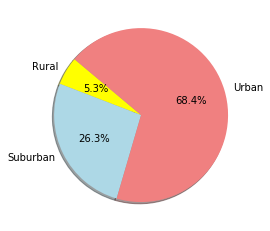

In [32]:
count = combined_display.groupby('type').count()['driver_count']
list_count = list(count)

plt.pie(list_count, explode = explode, autopct='%1.1f%%', labels = labels, colors = colors, shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x117b53160>,
 [Text(-0.9475355551847633, 0.5587274574071894, 'Rural'),
  Text(-0.9860007094711902, -0.48765008040839053, 'Suburban'),
  Text(1.0528174881480703, 0.3187088587560567, 'Urban')],
 [Text(-0.5168375755553254, 0.3047604313130124, '5.3%'),
  Text(-0.5378185688024674, -0.26599095295003117, '26.3%'),
  Text(0.5742640844444019, 0.17384119568512182, '68.4%')])

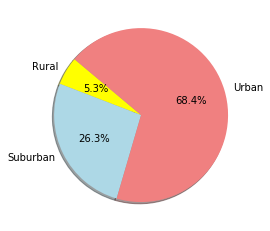

In [50]:
sizes3 = combined_display.groupby(['type'])['driver_count'].count()

plt.pie(sizes3, explode = explode, autopct='%1.1f%%', labels = labels, colors = colors, shadow=True, startangle=140)